# 3. ANALISIS EXPLORATORIO DE DATOS

### Se explorarán los datos obtenidos

In [2]:
# Importo las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importo los datos
data = pd.read_csv('../data/20220318_dataset_sellers.csv',index_col=None)

In [4]:
# vemos las columnas, si tiene nulos y el tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           5399 non-null   int64  
 1   categoria_MLA                        5399 non-null   object 
 2   seller                               5399 non-null   int64  
 3   fecha_registro                       5399 non-null   object 
 4   power_seller_status                  4992 non-null   object 
 5   level_id                             5399 non-null   object 
 6   cancellations_value                  5399 non-null   int64  
 7   cancellations_rate                   5399 non-null   float64
 8   claims_value                         5399 non-null   int64  
 9   claims_rate                          5399 non-null   float64
 10  delayed_handling_time_value          5399 non-null   int64  
 11  delayed_handling_time_rate    

In [5]:
# calculamos los datos nulos
data.isnull().sum()

Unnamed: 0                               0
categoria_MLA                            0
seller                                   0
fecha_registro                           0
power_seller_status                    407
level_id                                 0
cancellations_value                      0
cancellations_rate                       0
claims_value                             0
claims_rate                              0
delayed_handling_time_value              0
delayed_handling_time_rate               0
sales_value                              0
transactions_total_historic              0
transactions_canceled_historic           0
transactions_completed_historic          0
rating_negative                          0
rating_neutral                           0
rating_positive                          0
state                                    0
city                                     0
total_sales_amount                       0
total_items_sold                         0
total_profi

In [6]:
# Vemos los valores únicos de cada campo
data.nunique(axis=0)

Unnamed: 0                             1016
categoria_MLA                            27
seller                                 5399
fecha_registro                         5378
power_seller_status                       3
level_id                                  4
cancellations_value                     146
cancellations_rate                      209
claims_value                            229
claims_rate                             237
delayed_handling_time_value             386
delayed_handling_time_rate             1024
sales_value                            2915
transactions_total_historic            4549
transactions_canceled_historic         1656
transactions_completed_historic        4492
rating_negative                          26
rating_neutral                           21
rating_positive                          33
state                                    21
city                                    711
total_sales_amount                     4780
total_items_sold                

In [7]:
# hacemos un describe para entender mejor las variables
data.describe()

,Unnamed: 0,seller,cancellations_value,cancellations_rate,claims_value,claims_rate,delayed_handling_time_value,delayed_handling_time_rate,sales_value,transactions_total_historic,...,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_sales_amount,total_items_sold,total_profits_amount,avg_ticket,antiquity_ages,transactions_canceled_historic_rate
count,5399.000000,5.399000e+03,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5.399000e+03,...,5.399000e+03,5399.000000,5399.000000,5399.000000,5.399000e+03,5399.000000,5.399000e+03,5279.000000,5399.000000,5399.000000
mean,463.843119,2.429776e+08,8.539915,0.002370,19.884608,0.005494,46.953510,0.024621,2489.728839,1.470940e+04,...,1.397936e+04,0.016968,0.016249,0.966783,1.017495e+07,2256.905909,2.034990e+06,10342.364090,7.406001,0.051232
std,291.830444,2.123279e+08,26.173004,0.004146,58.014041,0.005859,157.667011,0.032194,6538.907571,3.971829e+04,...,3.770785e+04,0.023914,0.043758,0.051218,6.050490e+07,10817.642740,1.210098e+07,23744.095255,5.334253,0.027795
min,0.000000,3.909200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+01,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,53.992308,0.000000,0.000000
25%,205.000000,7.998767e+07,0.000000,0.000000,1.000000,0.000000,2.000000,0.002300,327.000000,1.635000e+03,...,1.552500e+03,0.000000,0.000000,0.960000,2.891209e+05,68.000000,5.782420e+04,1664.845000,3.000000,0.035292
50%,450.000000,1.842412e+08,1.000000,0.000000,5.000000,0.004300,10.000000,0.011600,885.000000,5.003000e+03,...,4.754000e+03,0.010000,0.010000,0.980000,1.249750e+06,450.000000,2.499500e+05,3671.000000,6.000000,0.046494
75%,715.000000,3.296792e+08,7.000000,0.003600,17.000000,0.009500,36.000000,0.034250,2427.000000,1.411300e+04,...,1.339350e+04,0.020000,0.020000,0.990000,4.883041e+06,1025.000000,9.766082e+05,8526.303399,11.000000,0.060843
max,1022.000000,1.069667e+09,646.000000,0.036200,1822.000000,0.039500,5397.000000,0.210500,213079.000000,1.393449e+06,...,1.322279e+06,0.530000,1.000000,1.000000,2.766589e+09,424622.000000,5.533179e+08,520000.000000,22.000000,0.900000


In [8]:
# se suprime la notacion cientifica
data.describe().apply(lambda y: y.apply(lambda x: format(x, 'f')))

,Unnamed: 0,seller,cancellations_value,cancellations_rate,claims_value,claims_rate,delayed_handling_time_value,delayed_handling_time_rate,sales_value,transactions_total_historic,...,transactions_completed_historic,rating_negative,rating_neutral,rating_positive,total_sales_amount,total_items_sold,total_profits_amount,avg_ticket,antiquity_ages,transactions_canceled_historic_rate
count,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,...,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5279.000000,5399.000000,5399.000000
mean,463.843119,242977641.263382,8.539915,0.002370,19.884608,0.005494,46.953510,0.024621,2489.728839,14709.402112,...,13979.359696,0.016968,0.016249,0.966783,10174952.166861,2256.905909,2034990.433340,10342.364090,7.406001,0.051232
std,291.830444,212327935.784290,26.173004,0.004146,58.014041,0.005859,157.667011,0.032194,6538.907571,39718.287722,...,37707.848871,0.023914,0.043758,0.051218,60504896.770264,10817.642740,12100979.355539,23744.095255,5.334253,0.027795
min,0.000000,39092.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.992308,0.000000,0.000000
25%,205.000000,79987673.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.002300,327.000000,1635.000000,...,1552.500000,0.000000,0.000000,0.960000,289120.910000,68.000000,57824.200000,1664.845000,3.000000,0.035292
50%,450.000000,184241184.000000,1.000000,0.000000,5.000000,0.004300,10.000000,0.011600,885.000000,5003.000000,...,4754.000000,0.010000,0.010000,0.980000,1249750.000000,450.000000,249950.000000,3671.000000,6.000000,0.046494
75%,715.000000,329679218.500000,7.000000,0.003600,17.000000,0.009500,36.000000,0.034250,2427.000000,14113.000000,...,13393.500000,0.020000,0.020000,0.990000,4883041.000000,1025.000000,976608.200000,8526.303399,11.000000,0.060843
max,1022.000000,1069666546.000000,646.000000,0.036200,1822.000000,0.039500,5397.000000,0.210500,213079.000000,1393449.000000,...,1322279.000000,0.530000,1.000000,1.000000,2766589430.000000,424622.000000,553317886.000000,520000.000000,22.000000,0.900000


### Analisis por provincia y localidad

In [18]:
# distribucion de los vendedores por provincia
data_prov = data.groupby('state', as_index=False).size()
data_prov['porcentaje'] = round(data_prov['size']/len(data)*100,1)
data_prov.sort_values('porcentaje', ascending=False).reset_index(drop=True)

,state,size,porcentaje
0,Capital Federal,2882,53.4
1,Buenos Aires,2045,37.9
2,Córdoba,161,3.0
3,Santa Fe,161,3.0
4,Mendoza,35,0.6
5,Entre Ríos,16,0.3
6,Misiones,18,0.3
7,Tucumán,14,0.3
8,La Pampa,10,0.2
9,Chubut,10,0.2


In [29]:
# distribucion de los vendedores por localidad
data_city = data.groupby('city', as_index=False).size()
data_city['porcentaje'] = round(data_city['size']/len(data)*100,1)
data_city = data_city.sort_values('porcentaje', ascending=False)
top_20 = data_city.head(20)
print('los primeros 20 representan el ',round(top_20.porcentaje.sum(),1))

los primeros 20 representan el  36.4


In [31]:
top_20

,city,size,porcentaje
41,Balvanera,200,3.7
398,Palermo,164,3.0
52,Belgrano,147,2.7
595,Villa Crespo,140,2.6
99,Caballito,142,2.6
195,Flores,102,1.9
508,San Nicolás,101,1.9
166,Córdoba,95,1.8
460,Rosario,90,1.7
198,Floresta,88,1.6


### Analisis por antiguedad de los sellers

In [82]:
data['antiquity_ages'].describe()

count    5399.000000
mean        7.399889
std         5.336329
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        22.000000
Name: antiquity_ages, dtype: float64

In [45]:
data_ant = data.groupby('antiquity_ages',as_index=False).size()
data_ant['porcentaje'] = round(data_ant['size']/len(data)*100,1)
data_ant = data_ant.sort_values('porcentaje', ascending=False)
recientes_6 = data_ant.loc[data_ant.antiquity_ages < 6]
print('porcentaje de sellers con menos de 6 años (debajo de la mediana):', recientes_6.sum()['porcentaje'])
recientes_2 = data_ant.loc[data_ant.antiquity_ages < 2]
print('porcentaje de sellers con menos de 2 años (debajo de la mediana):', recientes_2.sum()['porcentaje'])

porcentaje de sellers con menos de 6 años (debajo de la mediana): 45.099999999999994
porcentaje de sellers con menos de 2 años (debajo de la mediana): 12.6


<AxesSubplot:xlabel='antiquity_ages', ylabel='Count'>

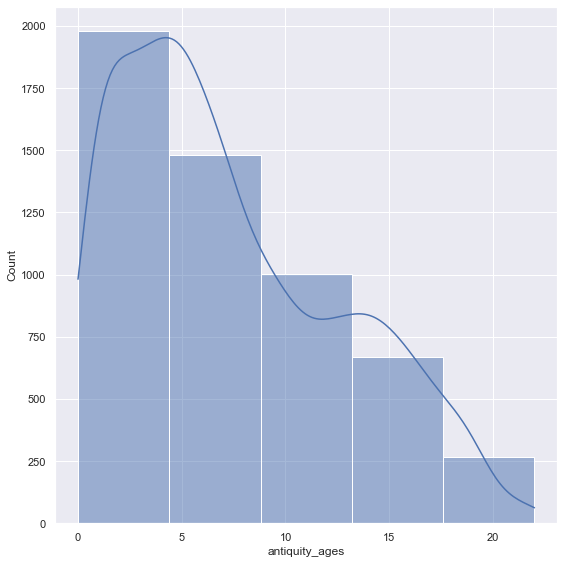

In [84]:
sns.histplot(data=data, x="antiquity_ages",kde=True, bins=5)

### Analisis por categorias actuales

In [27]:
# distribucion de los vendedores por tipo de mercado lider 
data.value_counts('power_seller_status')

power_seller_status
platinum    3756
gold         677
silver       559
dtype: int64

In [29]:
# distribucion de los vendedores por color del termometro 
data.value_counts('level_id')

level_id
5_green          5307
3_yellow           53
4_light_green      37
2_orange            2
dtype: int64

### Cantidad de ventas

#### En los últimos 60 días

In [78]:
data[['sales_value']].describe()

,sales_value
count,5399.000000
mean,2489.728839
std,6538.907571
min,1.000000
25%,327.000000
50%,885.000000
75%,2427.000000
max,213079.000000


In [58]:
total_sales_last60 = data[['sales_value']].sum()
total_sales_last60[0]

13442046

In [116]:
print('los sellers han vendido el ', round(total_sales_last60[0]/data.transactions_completed_historic.sum()*100,1), f'% de sus items totales en los últimos 60 días')

los sellers han vendido el  16.1 % de sus items totales en los últimos 60 días


<AxesSubplot:xlabel='sales_value', ylabel='Count'>

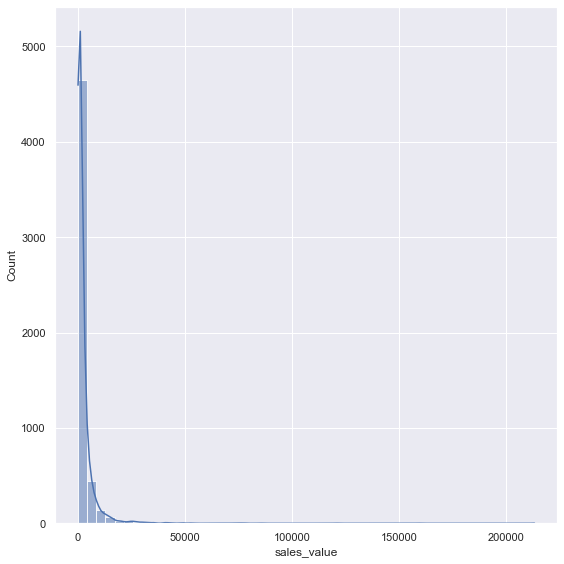

In [81]:
sns.histplot(data=data, x="sales_value",kde=True, bins= 50)

### Ventas canceladas por el vendedor

In [74]:
data[['cancellations_value', 'cancellations_rate']].describe()

,cancellations_value,cancellations_rate
count,5399.000000,5399.000000
mean,8.539915,0.002370
std,26.173004,0.004146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,7.000000,0.003600
max,646.000000,0.036200


In [78]:
sellers_cancelations = data.loc[data.cancellations_value == 0]
print('cantidad de sellers sin cancelaciones: ',len(sellers_cancelations))
print('porcentaje del total: ',(len(sellers_cancelations)/len(data)))

cantidad de sellers sin cancelaciones:  2127
porcentaje del total:  0.3939618447860715


In [84]:
sellers_cancelations = data.loc[data.cancellations_value != 0]
print('cantidad de sellers con cancelaciones: ',len(sellers_cancelations))
print('promedio de cancelaciones: ',(sellers_cancelations['cancellations_value'].mean()))

cantidad de sellers con cancelaciones:  3272
promedio de cancelaciones:  14.09138141809291


In [52]:
data['cancellations_value'].sum()

46107

In [64]:
print('porcentaje de ventas con cancelaciones',round(data['cancellations_value'].sum()/total_sales_last60[0]*100,1))

porcentaje de ventas con cancelaciones 0.3


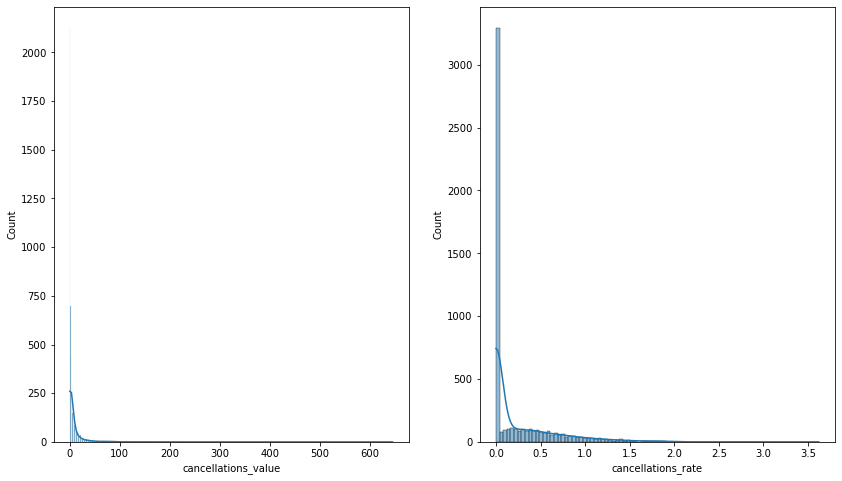

In [46]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.histplot(ax=axs[0],data=data, x="cancellations_value",kde=True)
sns.histplot(ax=axs[1],data=data, x=data["cancellations_rate"]*100,kde=True)
plt.show()

### Ventas con reclamos de clientes

In [73]:
data[['claims_value', 'claims_rate']].describe()

,claims_value,claims_rate
count,5399.000000,5399.000000
mean,19.884608,0.005494
std,58.014041,0.005859
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.004300
75%,17.000000,0.009500
max,1822.000000,0.039500


In [54]:
data['claims_value'].sum()

107357

In [85]:
sellers_claims = data.loc[data.claims_value == 0]
print('cantidad de sellers sin reclamos: ',len(sellers_claims))
print('porcentaje del total: ',(len(sellers_claims)/len(data)))

cantidad de sellers sin reclamos:  1038
porcentaje del total:  0.19225782552324505


In [96]:
sellers_claims_2 = data.loc[data.claims_value != 0]
print('cantidad de sellers con reclamos: ',len(sellers_claims_2))
print('porcentaje del total: ',(len(sellers_claims_2)/len(data)))
print('promedio de reclamos: ',sellers_claims_2.claims_value.mean())

cantidad de sellers con reclamos:  4361
porcentaje del total:  0.807742174476755
promedio de reclamos:  24.61751891767943


In [65]:
print('porcentaje de ventas con reclamos',round(data['claims_value'].sum()/total_sales_last60[0]*100,1))

porcentaje de ventas con reclamos 0.8


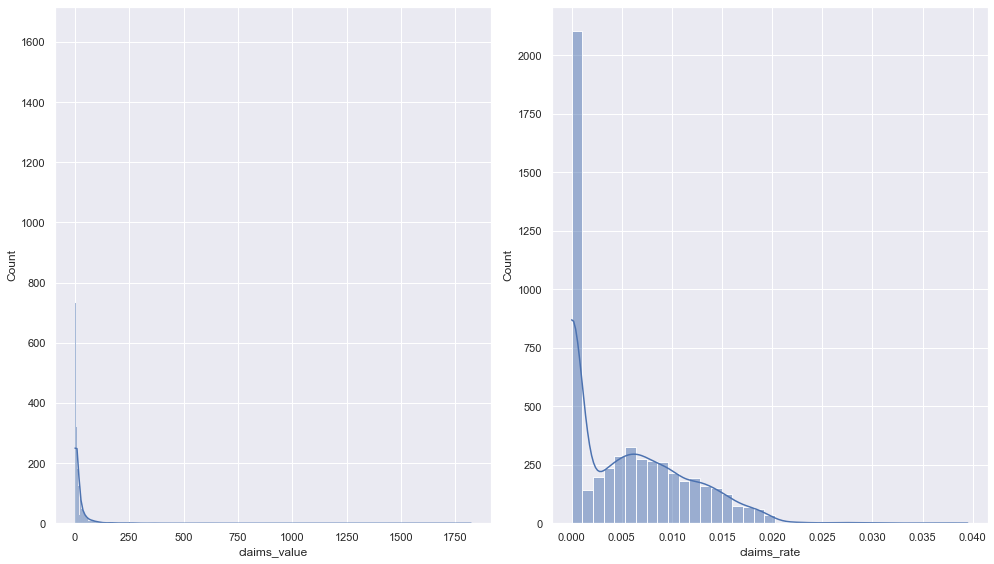

In [71]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.histplot(ax=axs[0],data=data, x="claims_value",kde=True)
sns.histplot(ax=axs[1],data=data, x="claims_rate",kde=True)
plt.show()

### Ventas con demora

In [75]:
data[['delayed_handling_time_value', 'delayed_handling_time_rate']].describe()

,delayed_handling_time_value,delayed_handling_time_rate
count,5399.000000,5399.000000
mean,46.953510,0.024621
std,157.667011,0.032194
min,0.000000,0.000000
25%,2.000000,0.002300
50%,10.000000,0.011600
75%,36.000000,0.034250
max,5397.000000,0.210500


In [55]:
data[['delayed_handling_time_value']].sum()

delayed_handling_time_value    253502
dtype: int64

In [67]:
print('porcentaje de ventas con demoras', round(data[['delayed_handling_time_value']].sum()/total_sales_last60[0]*100,1))

porcentaje de ventas con demoras delayed_handling_time_value    1.9
dtype: float64


In [88]:
sellers_delay = data.loc[data.delayed_handling_time_value == 0]
print('cantidad de sellers sin demoras: ',len(sellers_delay))
print('porcentaje del total: ',(len(sellers_delay)/len(data)))

cantidad de sellers sin demoras:  979
porcentaje del total:  0.181329875902945


In [97]:
sellers_delay_2 = data.loc[data.delayed_handling_time_value != 0]
print('cantidad de sellers con demoras: ',len(sellers_delay_2))
print('porcentaje del total: ',(len(sellers_delay_2)/len(data)))
print('promedio de demoras: ',sellers_delay_2.delayed_handling_time_value.mean())

cantidad de sellers con demoras:  4420
porcentaje del total:  0.818670124097055
promedio de demoras:  57.35339366515837


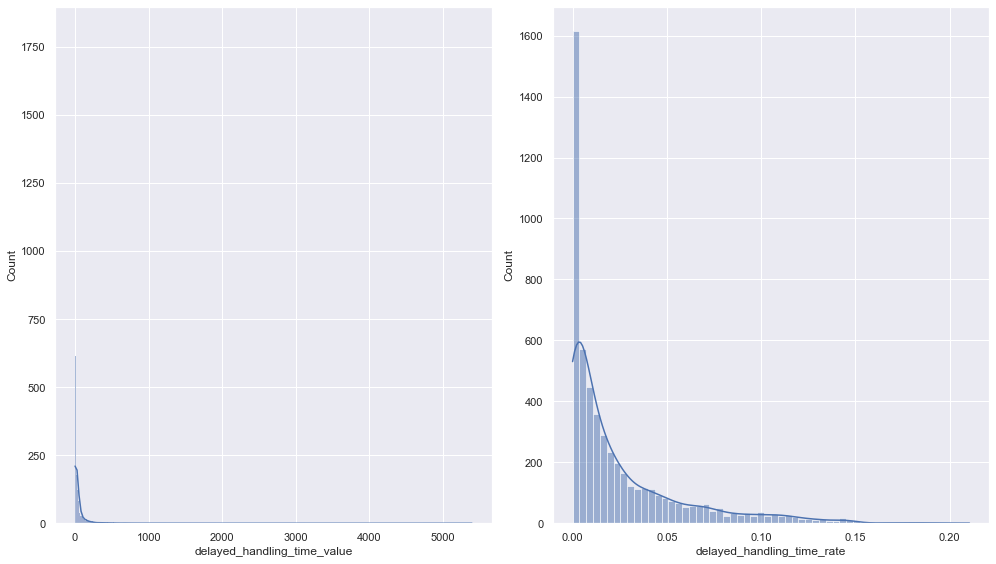

In [76]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.histplot(ax=axs[0],data=data, x="delayed_handling_time_value",kde=True)
sns.histplot(ax=axs[1],data=data, x="delayed_handling_time_rate",kde=True)
plt.show()

In [ ]:
sellers_claims = data.loc[data.claims_value == 0]
print('cantidad de sellers sin reclamos: ',len(sellers_claims))
print('porcentaje del total: ',(len(sellers_claims)/len(data)))

cantidad de sellers sin reclamos:  1038
porcentaje del total:  0.19225782552324505


In [ ]:
sellers_claims_2 = data.loc[data.claims_value != 0]
print('cantidad de sellers con reclamos: ',len(sellers_claims_2))
print('porcentaje del total: ',(len(sellers_claims_2)/len(data)))
print('promedio de reclamos: ',len(sellers_claims_2.mean()))

cantidad de sellers con reclamos:  4361
porcentaje del total:  0.807742174476755
promedio de reclamos:  21


#### Ventas y cancelaciones historicas

In [87]:
data[['transactions_total_historic','transactions_canceled_historic']].describe().apply(lambda y: y.apply(lambda x: format(x, 'f')))

,transactions_total_historic,transactions_canceled_historic
count,5399.000000,5399.000000
mean,14709.402112,730.042415
std,39718.287722,2107.104273
min,10.000000,0.000000
25%,1635.000000,71.000000
50%,5003.000000,235.000000
75%,14113.000000,671.000000
max,1393449.000000,71170.000000


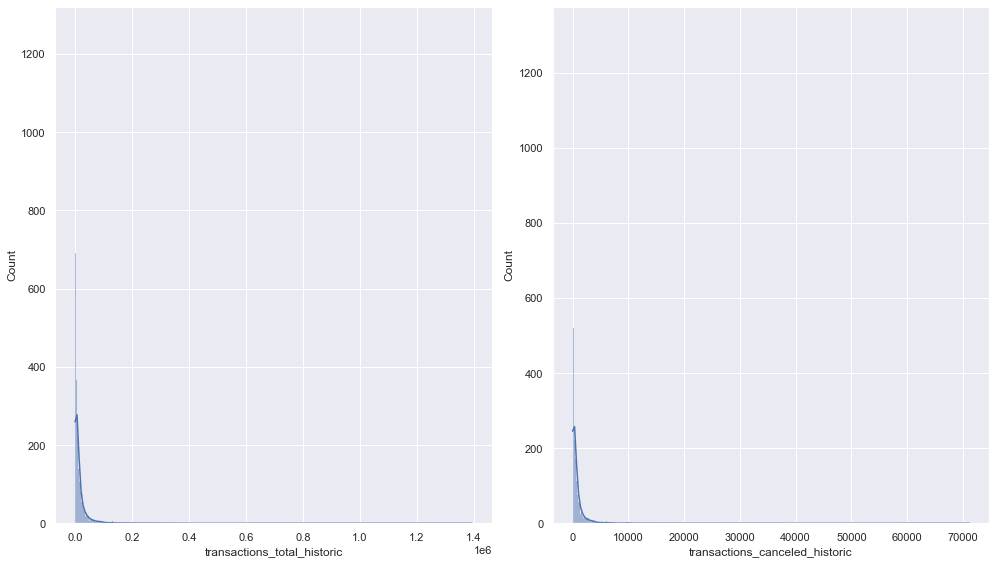

In [137]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.histplot(ax=axs[0],data=data, x="transactions_total_historic",kde=True)
sns.histplot(ax=axs[1],data=data, x="transactions_canceled_historic",kde=True)
plt.show()

In [111]:
# calculo total de items vendidos por los sellers
data['transactions_completed_historic'].sum()

75474563

### Ratings

In [90]:
data[['rating_negative', 'rating_neutral', 'rating_positive']].describe()

,rating_negative,rating_neutral,rating_positive
count,5399.000000,5399.000000,5399.000000
mean,0.016968,0.016249,0.966783
std,0.023914,0.043758,0.051218
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.960000
50%,0.010000,0.010000,0.980000
75%,0.020000,0.020000,0.990000
max,0.530000,1.000000,1.000000


In [100]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:xlabel='rating_negative'>

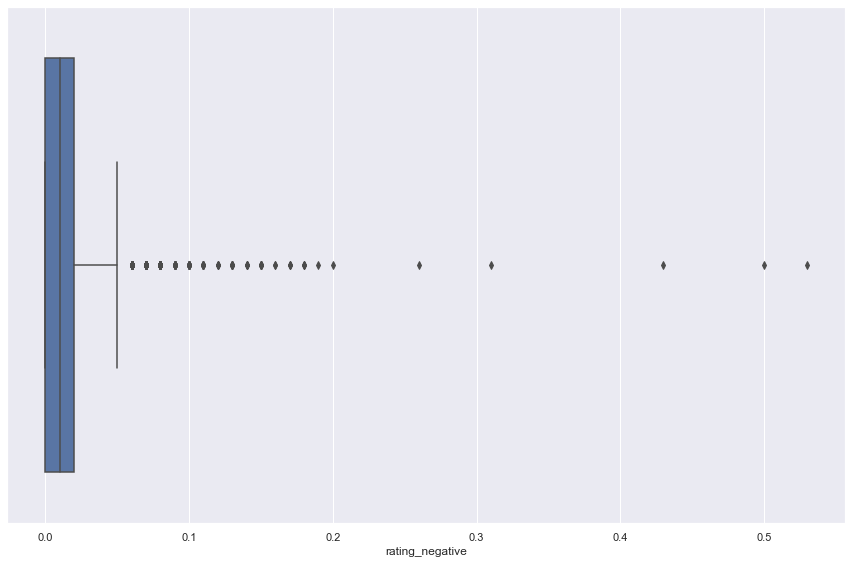

In [101]:
sns.boxplot(x=data["rating_negative"])

<AxesSubplot:xlabel='rating_neutral'>

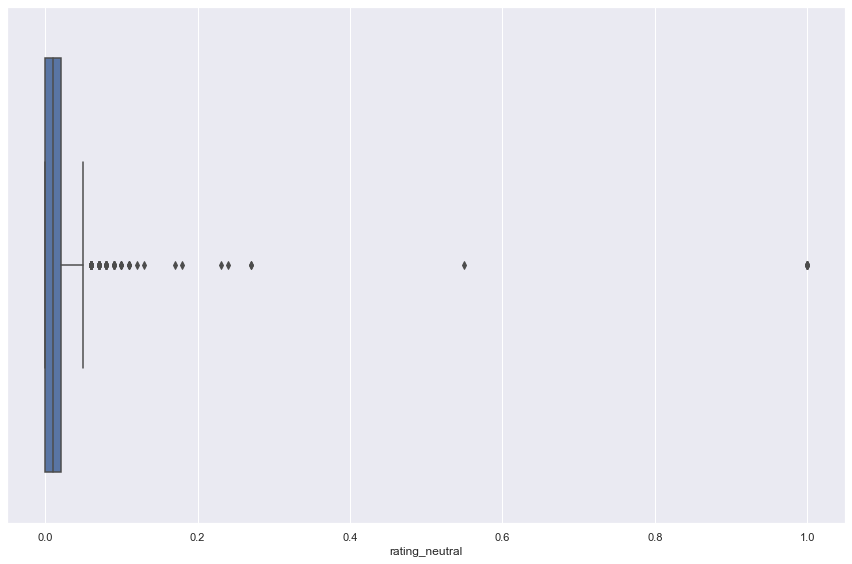

In [102]:
sns.boxplot(x=data["rating_neutral"])

<AxesSubplot:xlabel='rating_positive'>

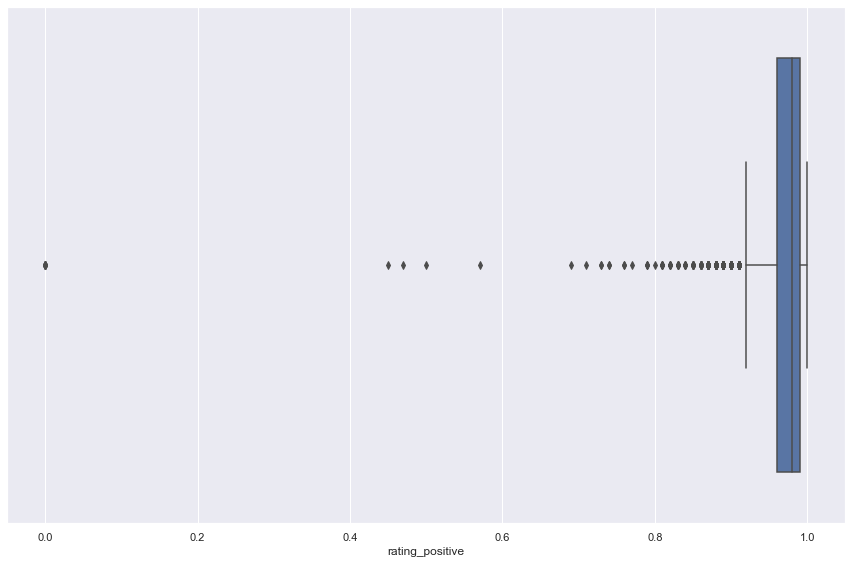

In [103]:
sns.boxplot(x=data["rating_positive"])

### Ingresos por ventas

In [98]:
data[['total_sales_amount', 'total_items_sold','avg_ticket']].describe().apply(lambda y: y.apply(lambda x: format(x, 'f')))

,total_sales_amount,total_items_sold,avg_ticket
count,5399.000000,5399.000000,5279.000000
mean,10174952.166861,2256.905909,10342.364090
std,60504896.770264,10817.642740,23744.095255
min,0.000000,0.000000,53.992308
25%,289120.910000,68.000000,1664.845000
50%,1249750.000000,450.000000,3671.000000
75%,4883041.000000,1025.000000,8526.303399
max,2766589430.000000,424622.000000,520000.000000


In [126]:
total_items_sold = data[['total_items_sold']].sum()
total_items_sold

total_items_sold    12185035
dtype: int64

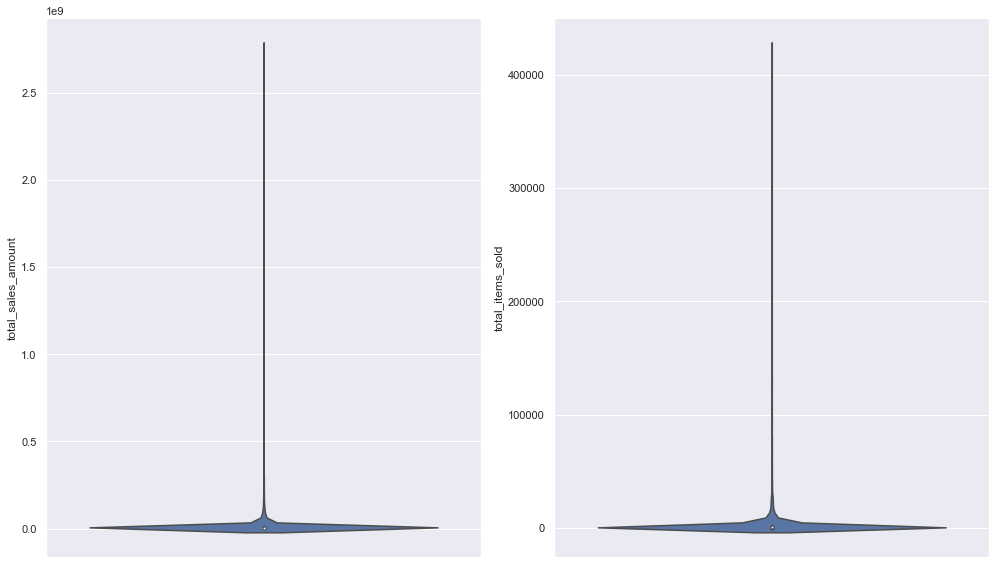

In [145]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.violinplot(ax=axs[0],data=data, y="total_sales_amount")
sns.violinplot(ax=axs[1],data=data, y="total_items_sold")
plt.show()

<AxesSubplot:ylabel='avg_ticket'>

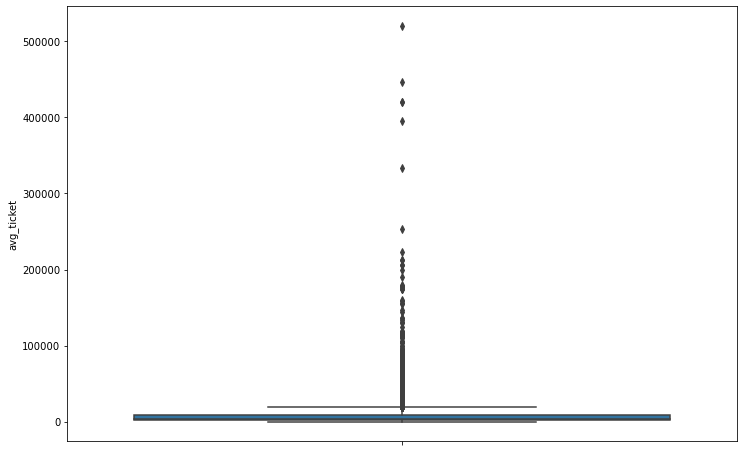

In [107]:
sns.boxplot(y=data["avg_ticket"])

### Ganancias estimadas

In [138]:
data[['total_profits_amount']].describe().apply(lambda y: y.apply(lambda x: format(x, 'f')))

,total_profits_amount
count,5399.000000
mean,2034990.433340
std,12100979.355539
min,0.000000
25%,57824.200000
50%,249950.000000
75%,976608.200000
max,553317886.000000


In [125]:
profits = data['total_profits_amount'].sum()
'{:f}'.format(profits)


'10986913349.599998'

<AxesSubplot:xlabel='total_profits_amount'>

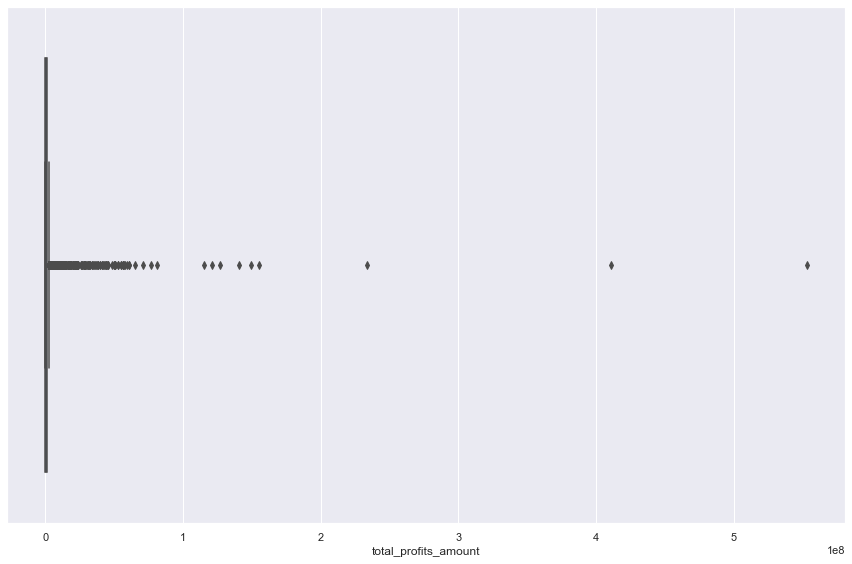

In [146]:
sns.boxplot(x=data["total_profits_amount"])

### ¿Existe relacion entre variables?

<AxesSubplot:>

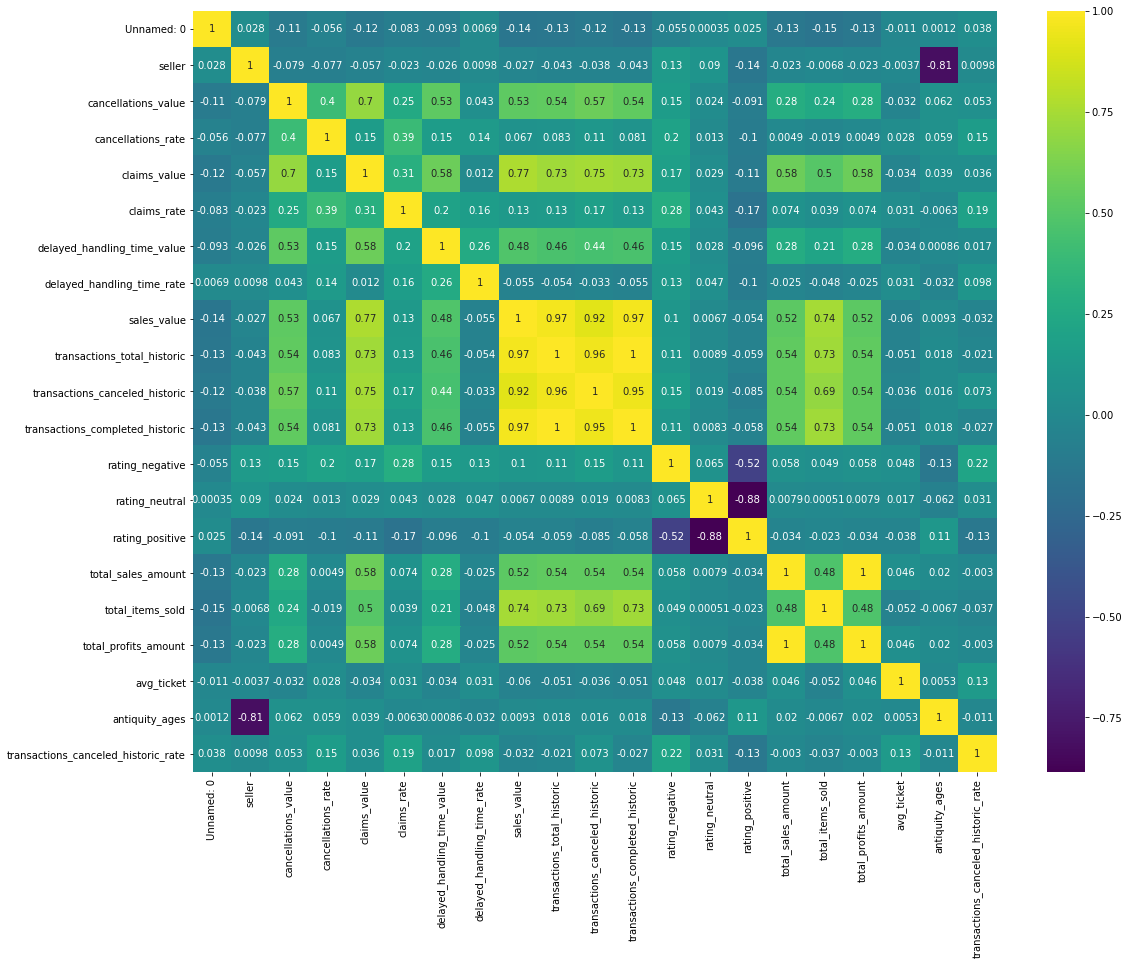

In [103]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='viridis')

#### Relacion entre cancelaciones y rating

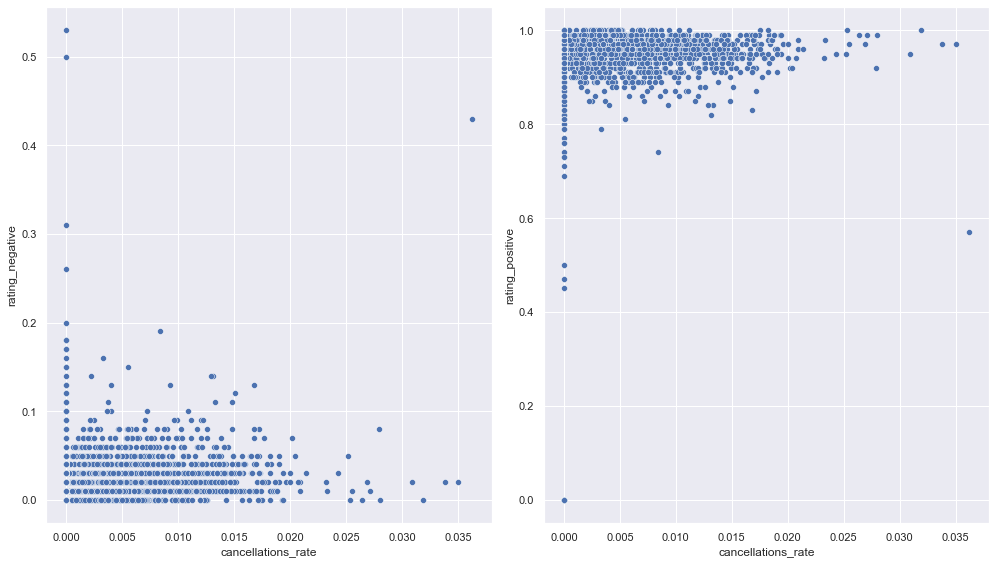

In [166]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.scatterplot(ax=axs[0],data=data, x='cancellations_rate', y='rating_negative')
sns.scatterplot(ax=axs[1],data=data, x='cancellations_rate', y='rating_positive')
plt.show()

#### Relacion entre reclamos y rating

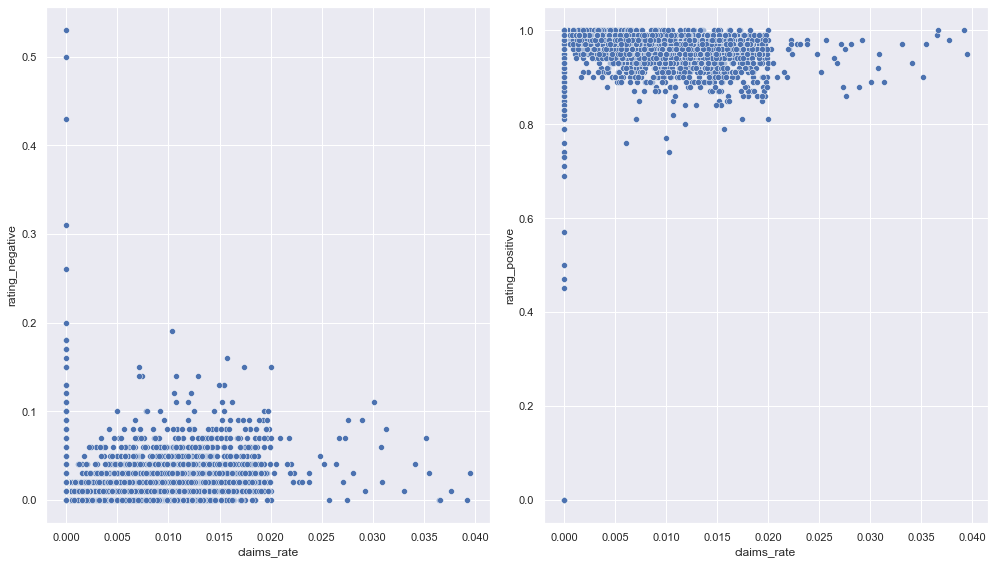

In [164]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.scatterplot(ax=axs[0],data=data, x='claims_rate', y='rating_negative')
sns.scatterplot(ax=axs[1],data=data, x='claims_rate', y='rating_positive')
plt.show()

#### Relacion entre demoras y rating

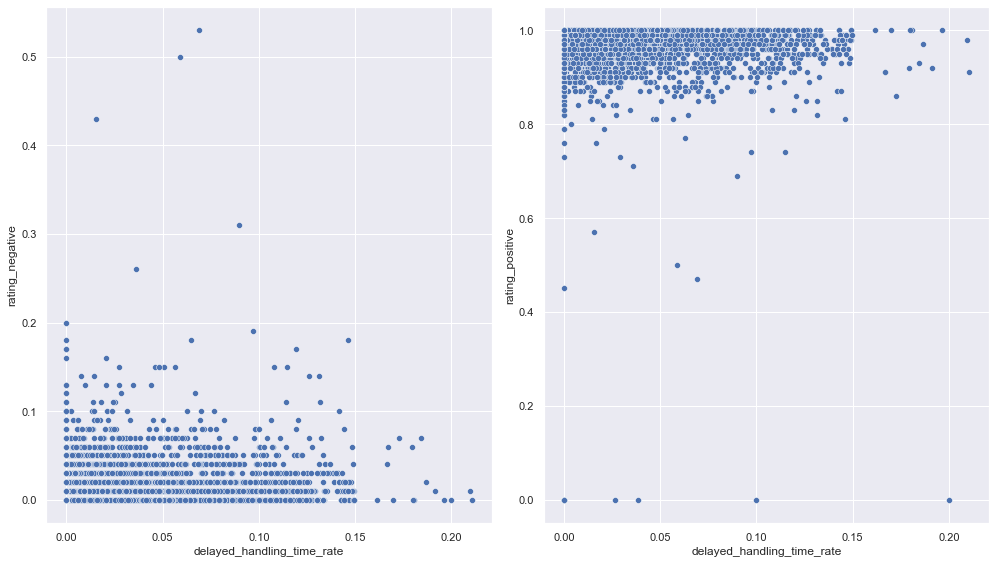

In [182]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.scatterplot(ax=axs[0],data=data, x='delayed_handling_time_rate', y='rating_negative')
sns.scatterplot(ax=axs[1],data=data, x='delayed_handling_time_rate', y='rating_positive')
plt.show()

#### Relacion entre antiguedad y rating

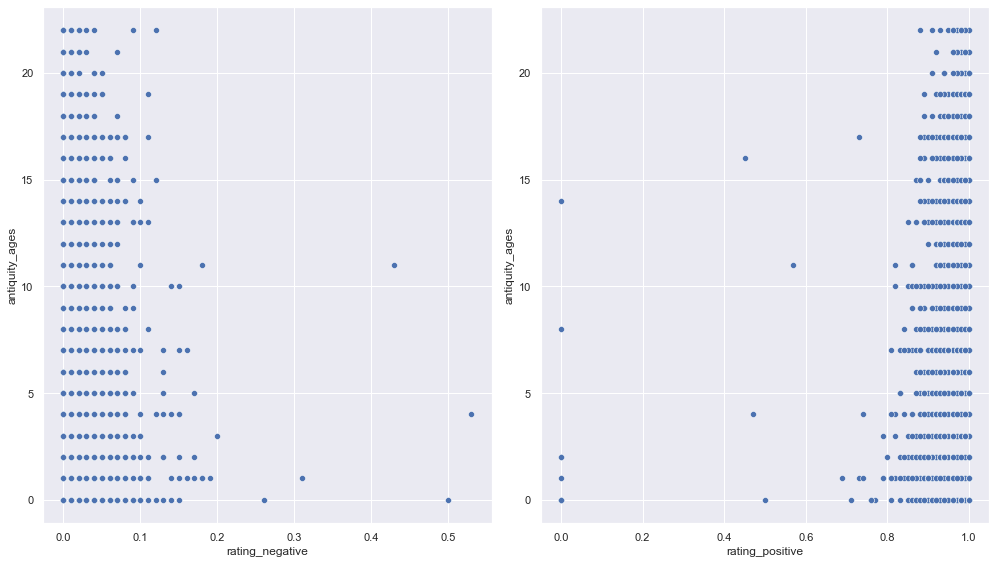

In [183]:
fig, axs = plt.subplots(1,2,figsize=(14, 8))
sns.scatterplot(ax=axs[0],data=data, x='rating_negative', y='antiquity_ages')
sns.scatterplot(ax=axs[1],data=data, x='rating_positive', y='antiquity_ages')
plt.show()